In [1]:
import sys
sys.path.append('../')
from src.load_data import *
from src.realtime_utils import *
from src.hp_tuning_functions import *
from src.plot_functions import *

In [2]:
from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import MinimalFCParameters

In [3]:
from tsfresh.utilities.dataframe_functions import roll_time_series

In [4]:
from tsfresh.feature_extraction import ComprehensiveFCParameters

In [5]:
# ComprehensiveFCParameters()

In [6]:
time_series_features = {
    'abs_energy': None,
    'absolute_maximum': None,
    'absolute_sum_of_changes': None,
    'autocorrelation': [{'lag': i} for i in range(1, 9)],
    'count_above_mean': None,
    'count_below_mean': None,
    'first_location_of_maximum': None,
    'first_location_of_minimum': None,
    'kurtosis': None,
    'last_location_of_maximum': None,
    'last_location_of_minimum': None,
    'linear_trend': [{'attr': 'pvalue'}, {'attr': 'rvalue'}, {'attr': 'intercept'}, {'attr': 'slope'}],
    'maximum': None,
    'mean': None,
    'mean_abs_change': None,
    'mean_change': None,
    'mean_second_derivative_central': None,
    'median': None,
    'minimum': None,
    'number_peaks': [{'n': 1}, {'n': 2}, {'n': 3}],
    'partial_autocorrelation': [{'lag': i} for i in range(1, 9)],
    'root_mean_square': None,
    'skewness': None,
    'standard_deviation': None
}

# Load data

In [7]:
targets, covariates = load_realtime_training_data()

/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/xarray/core/concat.py:544: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/xarray/core/concat.py:544: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.


In [8]:
# targets_train, targets_validation = train_validation_split(targets, 2023)

<Axes: xlabel='date'>

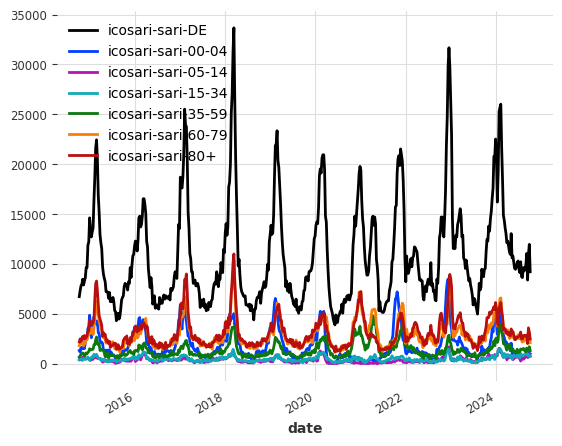

In [9]:
targets.plot()

<Axes: xlabel='date'>

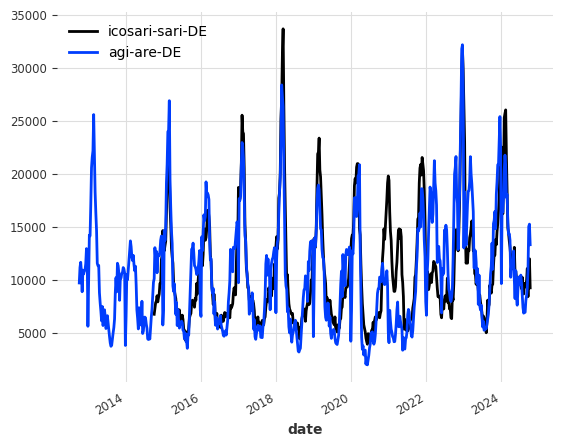

In [10]:
targets['icosari-sari-DE'].plot()
(covariates['agi-are-DE']*10).plot()

In [11]:
# targets_validation['icosari-sari-DE'].plot(label='validation')
# targets_train['icosari-sari-DE'].plot(label='train')

In [12]:
df_melted = targets.pd_dataframe().reset_index().melt(id_vars='date')

In [13]:
df_rolled = roll_time_series(df_melted, column_id="component", column_sort='date', min_timeshift=8, max_timeshift=8)

Rolling: 100%|██████████| 105/105 [00:00<00:00, 247.06it/s]


In [14]:
df_rolled = df_rolled.drop(columns='component')

In [15]:
df_features = extract_features(df_rolled, default_fc_parameters=time_series_features, column_id='id', column_sort='date')

Feature Extraction: 100%|██████████| 117/117 [00:01<00:00, 59.19it/s]


In [16]:
df_features

value__abs_energy  value__absolute_maximum  \
icosari-sari-00-04 2014-11-30         27050592.0                   2471.0   
                   2014-12-07         31757492.0                   2550.0   
                   2014-12-14         42809353.0                   3531.0   
                   2014-12-21         54254824.0                   3736.0   
                   2014-12-28         75159065.0                   4871.0   
...                                          ...                      ...   
icosari-sari-DE    2024-09-08        830374613.0                  11057.0   
                   2024-09-15        817236404.0                  11057.0   
                   2024-09-22        833094004.0                  11057.0   
                   2024-09-29        900203404.0                  11971.0   
                   2024-10-06        910606072.0                  11971.0   

                               value__absolute_sum_of_changes  \
icosari-sari-00-04 2014-11-30                          2261.0   
                   2014-12-07                          2190.0   
                   2014-12-14                          2776.0   
                   2014-12-21                          2886.0   
                   2014-12-28                          3851.0   
...                                                       ...   
icosari-sari-DE    2024-09-08                          5738.0   
                   2024-09-15                          7318.0   
                   2024-09-22                          8399.0   
                   2024-09-29                          9313.0   
                   2024-10-06                         11058.0   

                               value__autocorrelation__lag_1  \
icosari-sari-00-04 2014-11-30                       0.432490   
                   2014-12-07                       0.553599   
                   2014-12-14                       0.507528   
                   2014-12-21                       0.714099   
                   2014-12-28                       0.637849   
...                                                      ...   
icosari-sari-DE    2024-09-08                       0.085731   
                   2024-09-15                      -0.225636   
                   2024-09-22                      -0.342312   
                   2024-09-29                      -0.045299   
                   2024-10-06                      -0.269925   

                               value__autocorrelation__lag_2  \
icosari-sari-00-04 2014-11-30                       0.003760   
                   2014-12-07                       0.222956   
                   2014-12-14                       0.387684   
                   2014-12-21                       0.332354   
                   2014-12-28                       0.451432   
...                                                      ...   
icosari-sari-DE    2024-09-08                      -0.043264   
                   2024-09-15                      -0.220200   
                   2024-09-22                       0.312153   
                   2024-09-29                      -0.159198   
                   2024-10-06                      -0.381670   

                               value__autocorrelation__lag_3  \
icosari-sari-00-04 2014-11-30                       0.082380   
                   2014-12-07                      -0.080966   
                   2014-12-14                       0.025398   
                   2014-12-21                       0.105817   
                   2014-12-28                       0.000335   
...                                                      ...   
icosari-sari-DE    2024-09-08                       0.104227   
                   2024-09-15                      -0.027562   
                   2024-09-22                       0.067897   
                   2024-09-29                       0.351805   
                   2024-10-06                       0.488934   

                  

In [17]:
# drop columns that contain only one value
unique_cols = df_features.nunique()[df_features.nunique() == 1].index.tolist()
df_features = df_features.drop(columns=unique_cols)

In [18]:
df_features.shape

(3605, 43)

In [19]:
df_features = df_features.dropna(axis=1)

In [20]:
df_features.shape

(3605, 38)

In [74]:
# impute(df_features)

In [95]:
feature_list = []
for horizon in [1, 2, 3, 4]:
    y = df_melted.groupby("component").apply(lambda x: x.set_index("date")["value"].shift(-horizon), include_groups=False).T.unstack()
    y = y[y.index.isin(df_features.index)]
    y = y.dropna()
    df_features_temp = df_features[df_features.index.isin(y.index)]
    features_filtered = select_features(df_features_temp, y)
    feature_list += list(features_filtered.columns)
feature_list = list(set(feature_list))

In [98]:
y

component           date      
icosari-sari-00-04  2014-11-30     4871.0
                    2014-12-07     3847.0
                    2014-12-14     2617.0
                    2014-12-21     3100.0
                    2014-12-28     4061.0
                                   ...   
icosari-sari-DE     2024-08-11    11057.0
                    2024-08-18     8396.0
                    2024-08-25    10974.0
                    2024-09-01    11971.0
                    2024-09-08     9228.0
Length: 3577, dtype: float64

In [77]:
features_filtered = df_features[feature_list]

In [78]:
features_filtered

value__median  value__mean_change  \
icosari-sari-00-04 2014-11-30         1585.0             141.375   
                   2014-12-07         1680.0             170.000   
                   2014-12-14         1775.0             243.250   
                   2014-12-21         2151.0             257.000   
                   2014-12-28         2471.0             420.125   
...                                      ...                 ...   
icosari-sari-DE    2024-09-08         9560.0             239.000   
                   2024-09-15         9560.0            -228.750   
                   2024-09-22         9560.0             280.625   
                   2024-09-29         9644.0             415.625   
                   2024-10-06         9644.0             -52.000   

                               value__linear_trend__attr_"rvalue"  \
icosari-sari-00-04 2014-11-30                            0.846381   
                   2014-12-07                            0.891899   
                   2014-12-14                            0.862476   
                   2014-12-21                            0.918408   
                   2014-12-28                            0.945767   
...                                                           ...   
icosari-sari-DE    2024-09-08                            0.542689   
                   2024-09-15                            0.112068   
                   2024-09-22                            0.556162   
                   2024-09-29                            0.656183   
                   2024-10-06                            0.313350   

                               value__absolute_sum_of_changes   value__mean  \
icosari-sari-00-04 2014-11-30                          2261.0   1692.444444   
                   2014-12-07                          2190.0   1826.888889   
                   2014-12-14                          2776.0   2087.000000   
                   2014-12-21                          2886.0   2326.000000   
                   2014-12-28                          3851.0   2680.555556   
...                                                       ...           ...   
icosari-sari-DE    2024-09-08                          5738.0   9579.000000   
                   2024-09-15                          7318.0   9495.777778   
                   2024-09-22                          8399.0   9578.888889   
                   2024-09-29                          9313.0   9939.111111   
                   2024-10-06                         11058.0  10003.777778   

                               value__kurtosis  value__number_peaks__n_1  \
icosari-sari-00-04 2014-11-30         0.655563                       2.0   
                   2014-12-07        -0.845377                       2.0   
                   2014-12-14         1.644038                       2.0   
                   2014-12-21        -0.595404                       1.0   
                   2014-12-28        -0.027932                       1.0   
...                                        ...                       ...   
icosari-sari-DE    2024-09-08         0.605055                       2.0   
                   2024-09-15        -0.056366                       2.0   
                   2024-09-22        -0.769058                       2.0   
                   2024-09-29        -0.640754                       2.0   
                   2024-10-06        -0.321849                       2.0   

                               value__linear_trend__attr_"pvalue"  \
icosari-sari-00-04 2014-11-30                            0.004012   
                   2014-12-07                            0.001229   
                   2014-12-14                            0.002769   
                   2014-12-21                            0.000471   
                   2014-12-28                            0.000116   
...                                                           ...   
icosari-sari-DE    2024-09-08           

In [23]:
features_filtered = features_filtered.reset_index(names=['component', 'date'])

In [24]:
features_filtered.to_csv('../data/features/features_icosari_8w.csv', index=False)

In [21]:
df_features = df_features.reset_index(names=['component', 'date'])

In [22]:
df_features.shape

(3605, 40)

In [23]:
df_features.to_csv('../data/features/features_icosari_8w.csv', index=False)

In [24]:
def combine_component_and_feature_names(ts):
    return ts.with_columns_renamed(ts.columns, ts.static_covariates.component.unique() + '__' + ts.columns)

In [25]:
def load_features(lag=8):
    df_features = pd.read_csv(f'../data/features/features_icosari_{lag}w.csv')
    ts_features = TimeSeries.from_group_dataframe(df_features, group_cols=['component'], 
                                                  time_col='date', freq='7D', fillna_value=0)
    ts_features = [combine_component_and_feature_names(ts_age) for ts_age in ts_features]
    ts_features = [ts_age.with_static_covariates(None) for ts_age in ts_features]
    return concatenate(ts_features, axis='component')

In [26]:
ts_features = load_features()

In [27]:
ts_features.pd_dataframe()

component,icosari-sari-00-04__value__abs_energy,icosari-sari-00-04__value__absolute_maximum,icosari-sari-00-04__value__absolute_sum_of_changes,icosari-sari-00-04__value__autocorrelation__lag_1,icosari-sari-00-04__value__autocorrelation__lag_2,icosari-sari-00-04__value__autocorrelation__lag_3,icosari-sari-00-04__value__autocorrelation__lag_4,icosari-sari-00-04__value__autocorrelation__lag_5,icosari-sari-00-04__value__autocorrelation__lag_6,icosari-sari-00-04__value__autocorrelation__lag_7,...,icosari-sari-DE__value__minimum,icosari-sari-DE__value__number_peaks__n_1,icosari-sari-DE__value__number_peaks__n_2,icosari-sari-DE__value__number_peaks__n_3,icosari-sari-DE__value__partial_autocorrelation__lag_1,icosari-sari-DE__value__partial_autocorrelation__lag_2,icosari-sari-DE__value__partial_autocorrelation__lag_3,icosari-sari-DE__value__root_mean_square,icosari-sari-DE__value__skewness,icosari-sari-DE__value__standard_deviation
date,,,,,,,,,,,,,,,,,,,,,
2014-11-30,27050592.0,2471.0,2261.0,0.432490,0.003760,0.082380,-0.152172,-0.011389,-0.605998,-1.956758,...,6734.0,1.0,1.0,0.0,0.434687,-0.031460,-0.143482,8129.480119,0.276573,780.884889
2014-12-07,31757492.0,2550.0,2190.0,0.553599,0.222956,-0.080966,-0.192980,-0.278763,-0.817154,-1.531080,...,7316.0,1.0,1.0,0.0,0.590088,-0.266059,-0.180478,8448.905274,0.615831,753.681155
2014-12-14,42809353.0,3531.0,2776.0,0.507528,0.387684,0.025398,-0.457211,-0.564861,-1.009409,-1.022545,...,7815.0,1.0,1.0,0.0,0.426165,0.182210,-0.266990,9007.754012,1.674348,1231.152917
2014-12-21,54254824.0,3736.0,2886.0,0.714099,0.332354,0.105817,-0.431891,-0.834402,-1.027388,-1.560576,...,7898.0,1.0,0.0,0.0,0.673832,-0.258153,-0.118726,9536.685349,1.060631,1532.312615
2014-12-28,75159065.0,4871.0,3851.0,0.637849,0.451432,0.000335,-0.280175,-0.641630,-1.278704,-1.380810,...,7898.0,0.0,0.0,0.0,0.643500,0.035841,-0.583981,10375.903548,1.064686,2144.943448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-08,5188533.0,1119.0,846.0,0.581820,-0.033615,-0.263309,-0.428402,-0.728293,-0.560095,-0.223745,...,8646.0,2.0,1.0,0.0,0.085731,-0.050989,0.113624,9605.407117,0.748341,711.761820
2024-09-15,5610588.0,1119.0,977.0,0.782253,0.210267,-0.256664,-0.562036,-0.841016,-0.952040,-0.677007,...,8396.0,2.0,1.0,0.0,-0.225636,-0.285654,-0.178850,9529.115640,0.495947,796.397692
2024-09-22,6184035.0,1119.0,942.0,0.775668,0.413345,-0.019983,-0.627499,-1.074779,-1.027149,-0.982148,...,8396.0,2.0,2.0,0.0,-0.342312,0.220854,0.270021,9621.122619,0.530466,900.493253


In [14]:
ts_features = load_features(lag=8)
cov = covariates.slice_intersect(ts_features) # features start a bit later because of rolling window
ts_features = ts_features.slice_intersect(cov) # features are longer because they cover the whole period until now

In [16]:
cov = concatenate([cov.with_static_covariates(None), ts_features], axis='component')

In [111]:
def add_features(covariates):
    ts_features = load_features(lag=8)
    cov = covariates.slice_intersect(ts_features) # features start a bit later because of rolling window
    ts_features = ts_features.slice_intersect(cov) # features are longer because they cover the whole period until now
    cov = concatenate([cov.with_static_covariates(None), ts_features], axis='component')
    return cov

In [29]:
covariates = add_features(covariates)

In [30]:
from darts.models.forecasting.lgbm import LightGBMModel

/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/statsforecast/utils.py:231: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.


In [31]:
NUM_SAMPLES = 1000
HORIZON = 4

ENCODERS = {
    'datetime_attribute': {'future': ['month', 'weekofyear']}
}

In [32]:
covariates.columns

Index(['agi-are-DE', 'agi-are-00-04', 'agi-are-05-14', 'agi-are-15-34',
       'agi-are-35-59', 'agi-are-60+', 'icosari-sari-00-04__value__abs_energy',
       'icosari-sari-00-04__value__absolute_maximum',
       'icosari-sari-00-04__value__absolute_sum_of_changes',
       'icosari-sari-00-04__value__autocorrelation__lag_1',
       ...
       'icosari-sari-DE__value__minimum',
       'icosari-sari-DE__value__number_peaks__n_1',
       'icosari-sari-DE__value__number_peaks__n_2',
       'icosari-sari-DE__value__number_peaks__n_3',
       'icosari-sari-DE__value__partial_autocorrelation__lag_1',
       'icosari-sari-DE__value__partial_autocorrelation__lag_2',
       'icosari-sari-DE__value__partial_autocorrelation__lag_3',
       'icosari-sari-DE__value__root_mean_square',
       'icosari-sari-DE__value__skewness',
       'icosari-sari-DE__value__standard_deviation'],
      dtype='object', name='component', length=272)

In [33]:
lags_past_covariates = {
    'agi-are-DE': 8,
    'agi-are-00-04': 8,
    'agi-are-05-14': 8,
    'agi-are-15-34': 8,
    'agi-are-35-59': 8,
    'agi-are-60+': 8,
    'default_lags': 1
}

In [34]:
model = LightGBMModel(
    lags=8,
    lags_past_covariates=lags_past_covariates,
    lags_future_covariates= (0, 1),
    output_chunk_length=HORIZON,
    add_encoders=ENCODERS,
    likelihood="quantile",
    quantiles=QUANTILES,
    verbose=-1,
    use_static_covariates=False
)

In [35]:
model.fit(targets, covariates)

LightGBMModel(lags=8, lags_past_covariates={'agi-are-DE': 8, 'agi-are-00-04': 8, 'agi-are-05-14': 8, 'agi-are-15-34': 8, 'agi-are-35-59': 8, 'agi-are-60+': 8, 'default_lags': 1}, lags_future_covariates=(0, 1), output_chunk_length=4, output_chunk_shift=0, add_encoders={'datetime_attribute': {'future': ['month', 'weekofyear']}}, likelihood=quantile, quantiles=[0.025, 0.1, 0.25, 0.5, 0.75, 0.9, 0.975], random_state=None, multi_models=True, use_static_covariates=False, categorical_past_covariates=None, categorical_future_covariates=None, categorical_static_covariates=None, verbose=-1)

In [36]:
model.input_dim

{'target': 7, 'past': 272, 'future': 2}

In [43]:
len(model.lagged_feature_names)

372

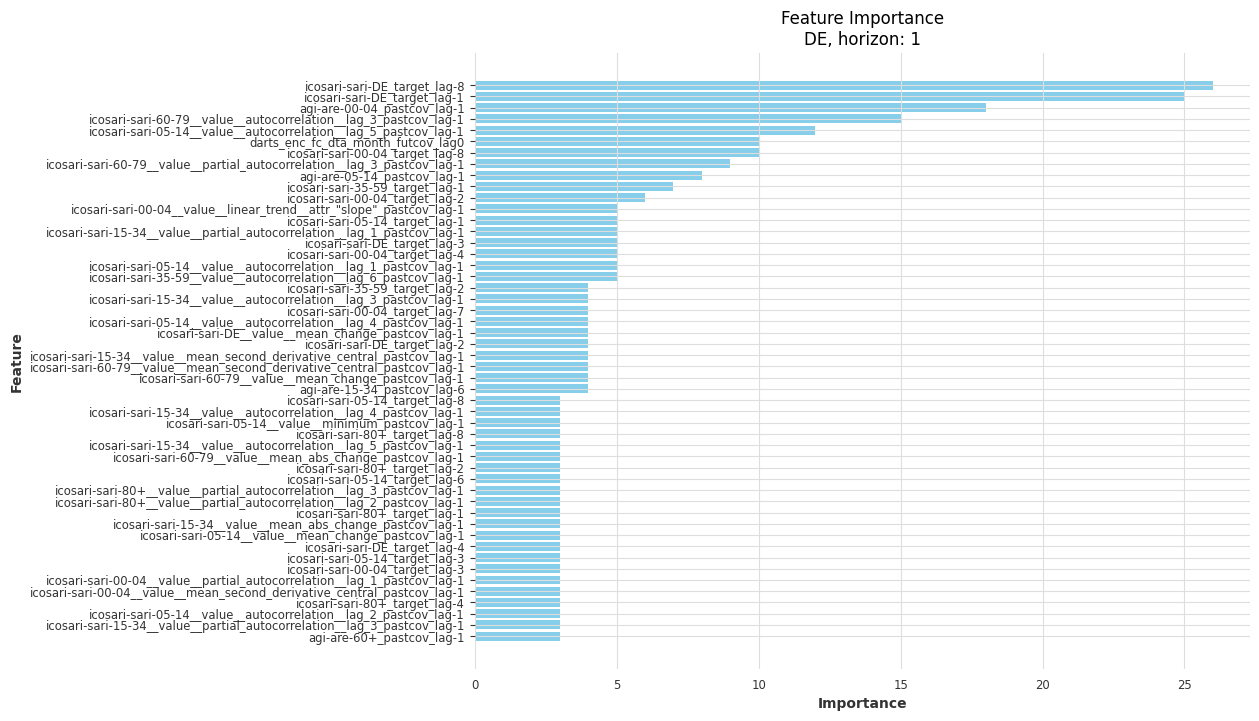

In [45]:
plot_importance_lgbm(model, age_group='DE', horizon=1, max_features=50, y_size=8)

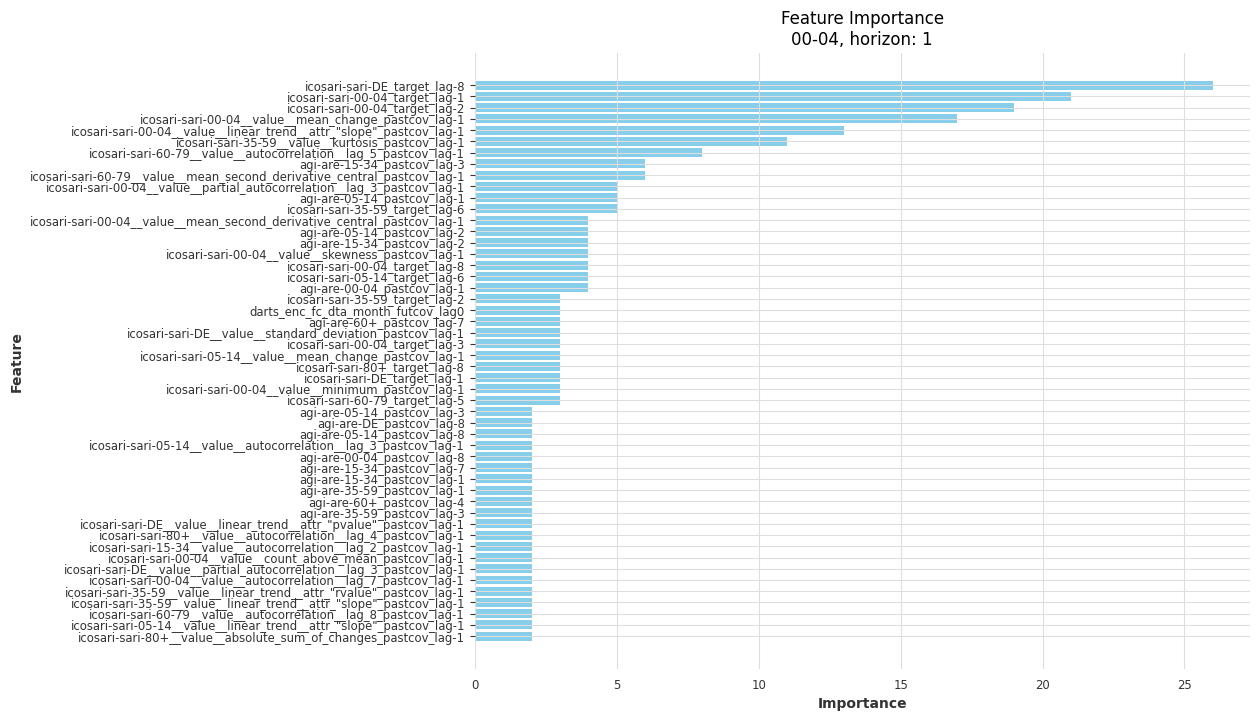

In [44]:
plot_importance_lgbm(model, age_group='00-04', horizon=1, max_features=50, y_size=8)

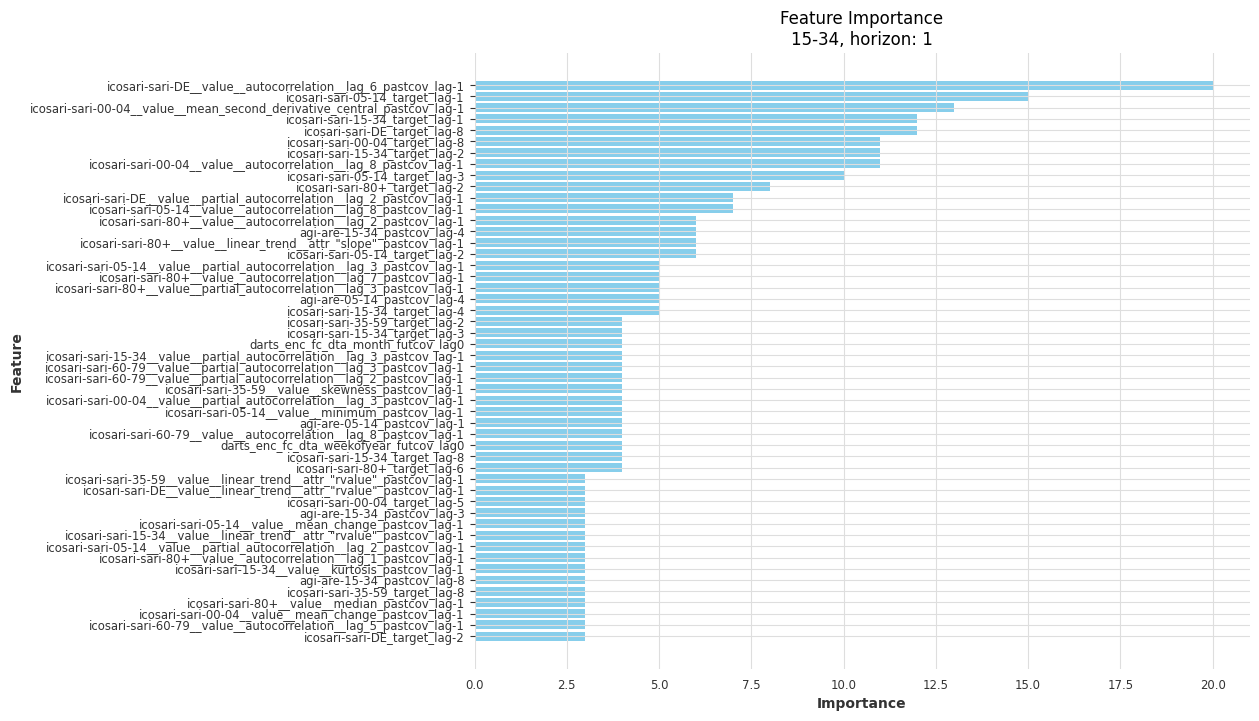

In [46]:
plot_importance_lgbm(model, age_group='15-34', horizon=1, max_features=50, y_size=8)

In [54]:
len(ts_features)

515

<Axes: xlabel='date'>

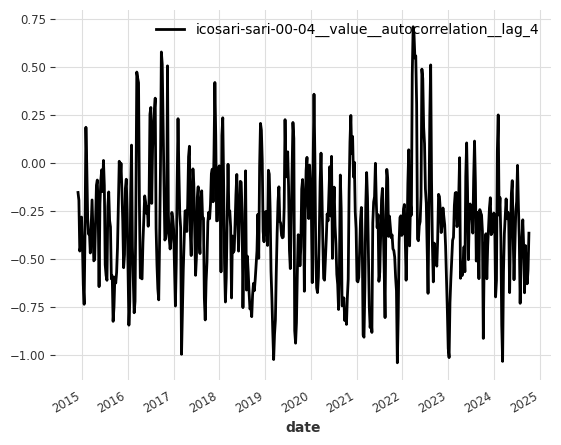

In [55]:
ts_features['icosari-sari-00-04__value__autocorrelation__lag_4'].plot()

Number of components is larger than 10 (266). Plotting only the first 10 components.You can overwrite this in the using the `plot_all_components` argument in plot()Beware that plotting a large number of components may cause performance issues.


<Axes: xlabel='date'>

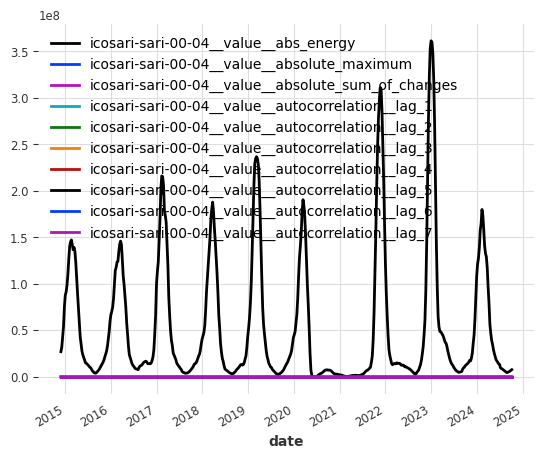

In [54]:
ts_features.plot()

In [33]:
TARGETS

['icosari-sari-DE',
 'icosari-sari-00-04',
 'icosari-sari-05-14',
 'icosari-sari-15-34',
 'icosari-sari-35-59',
 'icosari-sari-60-79',
 'icosari-sari-80+']

In [58]:
[col for col in ts_features.columns if TARGETS[0] in col]

['icosari-sari-DE__value__abs_energy',
 'icosari-sari-DE__value__absolute_maximum',
 'icosari-sari-DE__value__absolute_sum_of_changes',
 'icosari-sari-DE__value__autocorrelation__lag_1',
 'icosari-sari-DE__value__autocorrelation__lag_2',
 'icosari-sari-DE__value__autocorrelation__lag_3',
 'icosari-sari-DE__value__autocorrelation__lag_4',
 'icosari-sari-DE__value__autocorrelation__lag_5',
 'icosari-sari-DE__value__autocorrelation__lag_6',
 'icosari-sari-DE__value__autocorrelation__lag_7',
 'icosari-sari-DE__value__autocorrelation__lag_8',
 'icosari-sari-DE__value__count_above_mean',
 'icosari-sari-DE__value__count_below_mean',
 'icosari-sari-DE__value__first_location_of_maximum',
 'icosari-sari-DE__value__first_location_of_minimum',
 'icosari-sari-DE__value__kurtosis',
 'icosari-sari-DE__value__last_location_of_maximum',
 'icosari-sari-DE__value__last_location_of_minimum',
 'icosari-sari-DE__value__linear_trend__attr_"pvalue"',
 'icosari-sari-DE__value__linear_trend__attr_"rvalue"',
 'i

Number of components is larger than 10 (38). Plotting only the first 10 components.You can overwrite this in the using the `plot_all_components` argument in plot()Beware that plotting a large number of components may cause performance issues.


<Axes: xlabel='date'>

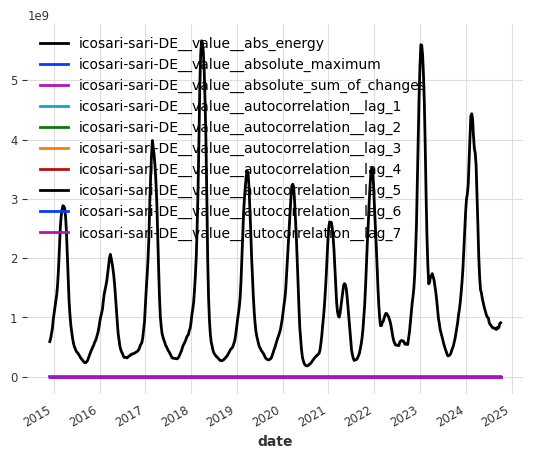

In [56]:
ts_features[[col for col in ts_features.columns if TARGETS[0] in col]].plot()

<Axes: xlabel='date'>

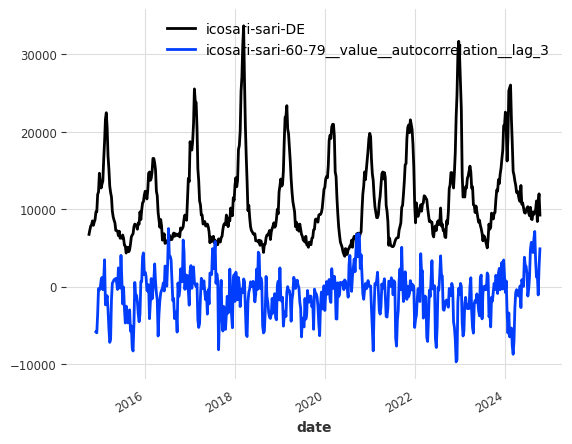

In [48]:
targets[TARGETS[0]].plot()
(ts_features[[
    'icosari-sari-60-79__value__autocorrelation__lag_3',
]]*10000).plot()

<Axes: xlabel='date'>

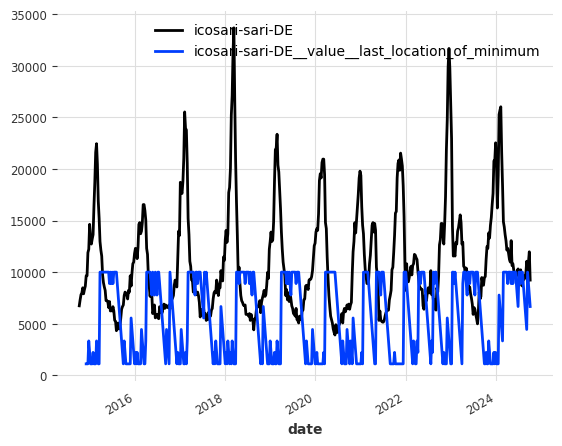

In [62]:
targets[TARGETS[0]].plot()
(ts_features[[
     'icosari-sari-DE__value__last_location_of_minimum'
]]*10000).plot()

<Axes: xlabel='date'>

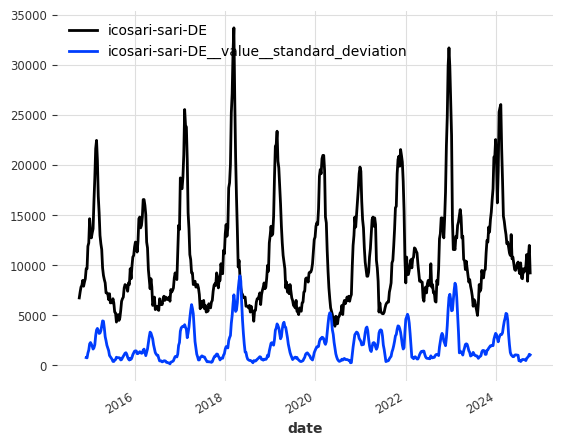

In [64]:
targets[TARGETS[0]].plot()
(ts_features[[
     'icosari-sari-DE__value__standard_deviation'
]]).plot()

<Axes: xlabel='date'>

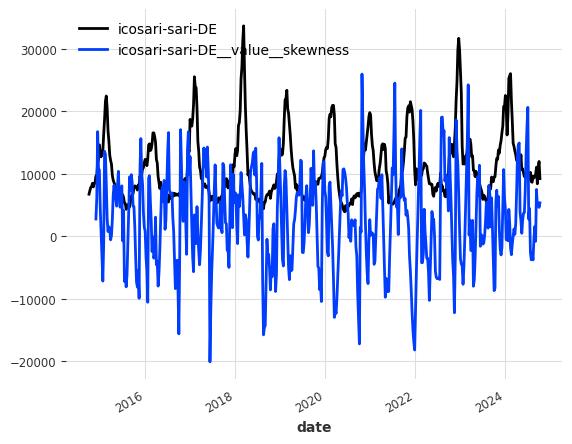

In [67]:
targets[TARGETS[0]].plot()
(ts_features[[
      'icosari-sari-DE__value__skewness'
]]*10000).plot()

<Axes: xlabel='date'>

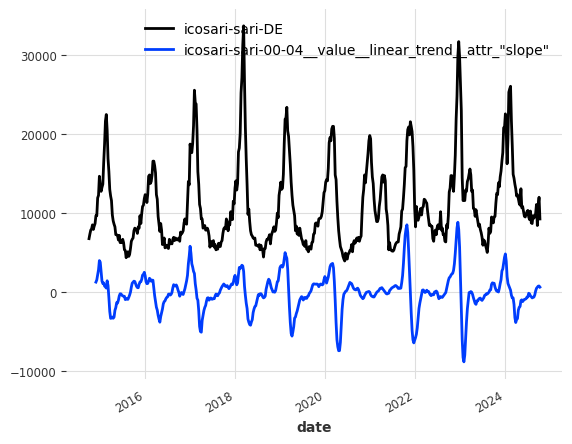

In [52]:
targets[TARGETS[0]].plot()
(ts_features[[
    #'icosari-sari-DE__value__linear_trend__attr_"pvalue"',
 #'icosari-sari-DE__value__linear_trend__attr_"rvalue"',
 #'icosari-sari-DE__value__linear_trend__attr_"intercept"',
 'icosari-sari-00-04__value__linear_trend__attr_"slope"'
]]*10).plot()

<Axes: xlabel='date'>

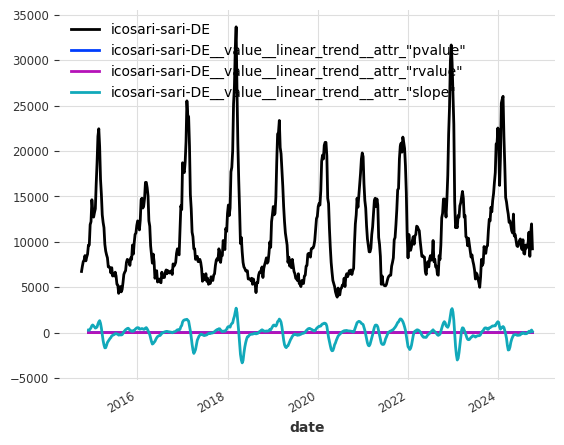

In [62]:
targets[TARGETS[0]].plot()
ts_features[[
    'icosari-sari-DE__value__linear_trend__attr_"pvalue"',
 'icosari-sari-DE__value__linear_trend__attr_"rvalue"',
 #'icosari-sari-DE__value__linear_trend__attr_"intercept"',
 'icosari-sari-DE__value__linear_trend__attr_"slope"'
]].plot()

<Axes: xlabel='date'>

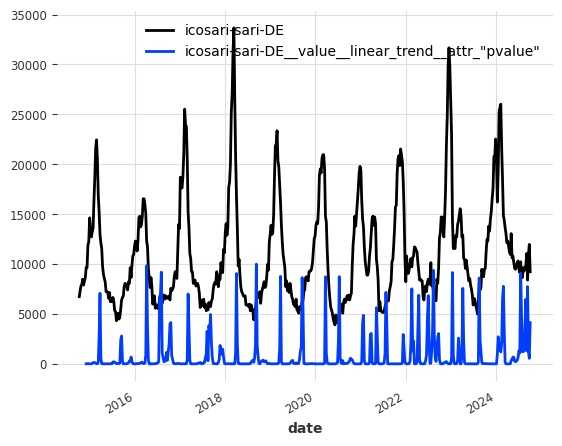

In [84]:
targets[TARGETS[0]].plot()
(ts_features[[
    'icosari-sari-DE__value__linear_trend__attr_"pvalue"',
 #'icosari-sari-DE__value__linear_trend__attr_"rvalue"',
 #'icosari-sari-DE__value__linear_trend__attr_"intercept"',
 #'icosari-sari-DE__value__linear_trend__attr_"slope"'
]]*10000).plot()

<Axes: xlabel='date'>

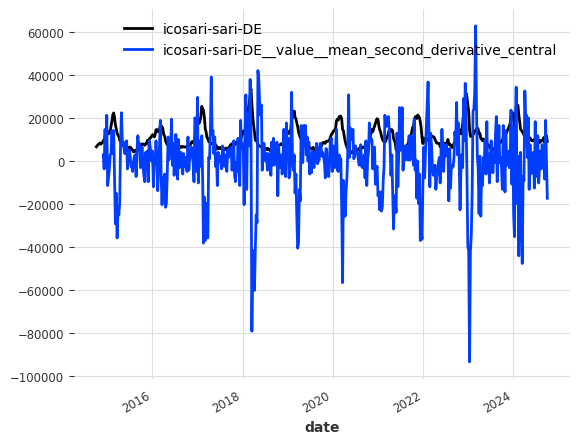

In [78]:
targets[TARGETS[0]].plot()
(ts_features[[
    'icosari-sari-DE__value__mean_second_derivative_central'
]]*100).plot()

<Axes: xlabel='date'>

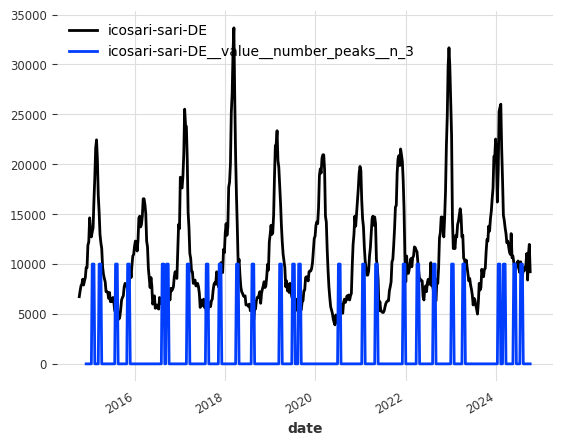

In [65]:
targets[TARGETS[0]].plot()
(ts_features[[
 #'icosari-sari-DE__value__number_peaks__n_1',
 #'icosari-sari-DE__value__number_peaks__n_2',
 'icosari-sari-DE__value__number_peaks__n_3'
]]*10000).plot()

<Axes: xlabel='date'>

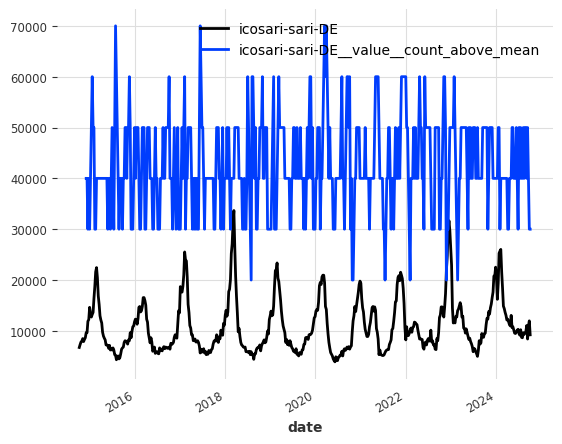

In [68]:
targets[TARGETS[0]].plot()
(ts_features[[
 'icosari-sari-DE__value__count_above_mean',
 #'icosari-sari-DE__value__count_below_mean',
]]*10000).plot()

abs_energy, absolute_maximum, absolute_sum_of_changes, autocorrelation, count_above_mean, count_below_mean, 
first_location_of_maximum, first_location_of_minimum, kurtosis, last_location_of_maximum, last_location_of_minimum,
linear_trend, maximum, mean, mean_abs_change, mean_change, mean_second_derivative_central, median, minimum, number_peaks,
partial_autocorrelation, root_mean_square, skewness, standard_deviation

In [ ]:
time_series_features = {
    'abs_energy': None,
    'absolute_maximum': None,
    'absolute_sum_of_changes': None,
    'autocorrelation': [{'lag': i} for i in range(1, 9)],
    'count_above_mean': None,
    'count_below_mean': None,
    'first_location_of_maximum': None,
    'first_location_of_minimum': None,
    'kurtosis': None,
    'last_location_of_maximum': None,
    'last_location_of_minimum': None,
    'linear_trend': [{'param': [{'attr': 'pvalue'}, {'attr': 'rvalue'}, {'attr': 'intercept'}, {'attr': 'slope'}]}],
    'maximum': None,
    'mean': None,
    'mean_abs_change': None,
    'mean_change': None,
    'mean_second_derivative_central': None,
    'median': None,
    'minimum': None,
    'number_peaks': [{'n': 1}, {'n': 2}, {'n': 3}],
    'partial_autocorrelation': [{'lag': i} for i in range(1, 9)],
    'root_mean_square': None,
    'skewness': None,
    'standard_deviation': None
}

# PCA

In [48]:
from sklearn.decomposition import PCA

In [47]:
df_features = ts_features.pd_dataframe()

In [106]:
df_features = covariates.pd_dataframe()

In [107]:
pca = PCA()

In [108]:
pca.fit(df_features)

PCA()

In [104]:
[f"{value:.4f}" for value in pca.explained_variance_ratio_]

['0.9519', '0.0327', '0.0105', '0.0024', '0.0015', '0.0006', '0.0003']

In [109]:
[f"{value:.4f}" for value in pca.explained_variance_ratio_]

['0.9309', '0.0500', '0.0153', '0.0031', '0.0006', '0.0000']

### Remove highly correlated features

In [28]:
import numpy as np

In [39]:
df_features = ts_features.pd_dataframe()

In [40]:
corr_matrix = df_features.iloc[:, 2:].corr().abs()

In [41]:
upper_tri = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

In [42]:
threshold = 0.9  # Set your threshold for high correlation
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]

In [43]:
df_features.shape

(515, 189)

In [44]:
len(to_drop)

87

In [46]:
[f for f in df_features.columns if f not in to_drop]

['icosari-sari-00-04__value__abs_energy',
 'icosari-sari-00-04__value__absolute_maximum',
 'icosari-sari-00-04__value__absolute_sum_of_changes',
 'icosari-sari-00-04__value__count_above_mean',
 'icosari-sari-00-04__value__first_location_of_maximum',
 'icosari-sari-00-04__value__first_location_of_minimum',
 'icosari-sari-00-04__value__kurtosis',
 'icosari-sari-00-04__value__linear_trend__attr_"pvalue"',
 'icosari-sari-00-04__value__linear_trend__attr_"rvalue"',
 'icosari-sari-00-04__value__linear_trend__attr_"intercept"',
 'icosari-sari-00-04__value__linear_trend__attr_"slope"',
 'icosari-sari-00-04__value__mean_second_derivative_central',
 'icosari-sari-00-04__value__number_peaks__n_1',
 'icosari-sari-00-04__value__number_peaks__n_2',
 'icosari-sari-00-04__value__number_peaks__n_3',
 'icosari-sari-00-04__value__skewness',
 'icosari-sari-05-14__value__abs_energy',
 'icosari-sari-05-14__value__absolute_sum_of_changes',
 'icosari-sari-05-14__value__count_above_mean',
 'icosari-sari-05-14_